In [10]:
import os
import cv2

# Specify the path to the training_set directory
train_dir = 'C:/Users/hp/Documents/colon_image_sets'

# Specify the subfolder names
adenocarcinomas_dir = os.path.join(train_dir, 'adenocarcinomas')
benign_dir = os.path.join(train_dir, 'benign')

# Function to convert images to grayscale and save in the same folder
def convert_images_to_grayscale(folder_path):
    # List the files in the folder
    files = os.listdir(folder_path)

    for file in files:
        # Get the full path of the input file
        input_file_path = os.path.join(folder_path, file)

        # Read the color image
        color_image = cv2.imread(input_file_path)

        if color_image is not None:
            # Convert to grayscale
            grayscale_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

            # Save the grayscale image in the same folder
            output_file_path = os.path.join(folder_path, file)
            cv2.imwrite(output_file_path, grayscale_image)
        else:
            print(f"Skipping '{file}' as it is not a valid image file.")

# Convert images to grayscale in the adenocarcinomas subfolder
convert_images_to_grayscale(adenocarcinomas_dir)

# Convert images to grayscale in the benign subfolder
convert_images_to_grayscale(benign_dir)

print("Images in adenocarcinomas and benign subfolders converted to grayscale.")

Images in adenocarcinomas and benign subfolders converted to grayscale.


In [11]:
import os
import cv2

# Specify the path to the training_set directory
train_dir = 'C:/Users/hp/Documents/colon_image_sets'

# Specify the subfolder names
adenocarcinomas_dir = os.path.join(train_dir, 'adenocarcinomas')
benign_dir = os.path.join(train_dir, 'benign')

# Function to apply CLAHE to images in a folder
def apply_clahe_to_images(folder_path, clip_limit=2.0, grid_size=(8, 8)):
    # List the files in the folder
    files = os.listdir(folder_path)

    for file in files:
        # Get the full path of the input file
        input_file_path = os.path.join(folder_path, file)

        # Read the grayscale image
        grayscale_image = cv2.imread(input_file_path, cv2.IMREAD_GRAYSCALE)

        if grayscale_image is not None:
            # Apply CLAHE
            clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=grid_size)
            clahe_image = clahe.apply(grayscale_image)

            # Save the CLAHE-enhanced image in the same folder
            output_file_path = os.path.join(folder_path, file)
            cv2.imwrite(output_file_path, clahe_image)
        else:
            print(f"Skipping '{file}' as it is not a valid image file.")

# Apply CLAHE to images in the adenocarcinomas subfolder
apply_clahe_to_images(adenocarcinomas_dir)

# Apply CLAHE to images in the benign subfolder
apply_clahe_to_images(benign_dir)

print("CLAHE applied to images in adenocarcinomas and benign subfolders.")

CLAHE applied to images in adenocarcinomas and benign subfolders.


In [12]:
import os
import cv2

# Specify the path to the training_set directory
train_dir = 'C:/Users/hp/Documents/colon_image_sets'

# Specify the subfolder names
adenocarcinomas_dir = os.path.join(train_dir, 'adenocarcinomas')
benign_dir = os.path.join(train_dir, 'benign')

# Function to apply Gaussian blur to images in a folder
def apply_gaussian_blur_to_images(folder_path, kernel_size=(3, 3)):
    # List the files in the folder
    files = os.listdir(folder_path)

    for file in files:
        # Get the full path of the input file
        input_file_path = os.path.join(folder_path, file)

        # Read the grayscale image
        grayscale_image = cv2.imread(input_file_path, cv2.IMREAD_GRAYSCALE)

        if grayscale_image is not None:
            # Apply Gaussian blur
            blurred_image = cv2.GaussianBlur(grayscale_image, kernel_size, 0)

            # Save the blurred image in the same folder
            output_file_path = os.path.join(folder_path, file)
            cv2.imwrite(output_file_path, blurred_image)
        else:
            print(f"Skipping '{file}' as it is not a valid image file.")

# Apply Gaussian blur to images in the adenocarcinomas subfolder
apply_gaussian_blur_to_images(adenocarcinomas_dir)

# Apply Gaussian blur to images in the benign subfolder
apply_gaussian_blur_to_images(benign_dir)

print("Gaussian blur applied to images in adenocarcinomas and benign subfolders.")

Gaussian blur applied to images in adenocarcinomas and benign subfolders.


In [13]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Specify the path to the training_set directory
train_dir = 'C:/Users/hp/Documents/colon_image_sets'

# Specify the subfolder names
adenocarcinomas_dir = os.path.join(train_dir, 'adenocarcinomas')
benign_dir = os.path.join(train_dir, 'benign')

# Function to apply histogram equalization and identify ROI in images
def process_images_in_folder(folder_path):
    # List the files in the folder
    files = os.listdir(folder_path)

    for file in files:
        # Get the full path of the input file
        input_file_path = os.path.join(folder_path, file)

        # Read the grayscale image
        image = cv2.imread(input_file_path, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            # Apply histogram equalization to enhance contrast
            equalized_image = cv2.equalizeHist(image)

            # Apply a binary threshold to segment the image
            _, thresholded_image = cv2.threshold(equalized_image, 150, 255, cv2.THRESH_BINARY)

            # Find contours in the thresholded image
            contours, _ = cv2.findContours(thresholded_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

            # Draw the contours on the original image
            roi_image = image.copy()
            cv2.drawContours(roi_image, contours, -1, (0, 255, 0), 2)

            # Save the processed image in the same folder
            output_file_path = os.path.join(folder_path, file)
            cv2.imwrite(output_file_path, roi_image)

        else:
            print(f"Skipping '{file}' as it is not a valid image file.")

# Process images in the adenocarcinomas subfolder
process_images_in_folder(adenocarcinomas_dir)

# Process images in the benign subfolder
process_images_in_folder(benign_dir)

print("ROI identification applied to images in adenocarcinomas and benign subfolders.")

ROI identification applied to images in adenocarcinomas and benign subfolders.


In [50]:
import os
import cv2
import mahotas.features as ft
import numpy as np
import pandas as pd

# Specify the path to the training_set directory
train_dir = 'C:/Users/hp/Documents/colon_image_sets'

# Specify the subfolder names
adenocarcinomas_dir = os.path.join(train_dir, 'adenocarcinomas')
benign_dir = os.path.join(train_dir, 'benign')

# Function to extract texture features from images in a folder
def extract_texture_features(folder_path):
    # List the files in the folder
    files = os.listdir(folder_path)

    features = []

    for file in files:
        # Get the full path of the input file
        input_file_path = os.path.join(folder_path, file)

        # Read the grayscale image
        image = cv2.imread(input_file_path, cv2.IMREAD_GRAYSCALE)

        if image is not None:
            # Extract texture features (Haralick features in this case)
            texture_features = ft.haralick(image).mean(axis=0)

            # Append the features to the list
            features.append(texture_features)
        else:
            print(f"Skipping '{file}' as it is not a valid image file.")

    return features

# Extract texture features from images in the adenocarcinomas subfolder
adenocarcinomas_features = extract_texture_features(adenocarcinomas_dir)

# Extract texture features from images in the benign subfolder
benign_features = extract_texture_features(benign_dir)

# Create a DataFrame to store features and labels
features_df = pd.DataFrame(adenocarcinomas_features + benign_features, columns=[f'feature_{i}' for i in range(len(adenocarcinomas_features[0]))])
features_df['label'] = ['adenocarcinoma'] * len(adenocarcinomas_features) + ['benign'] * len(benign_features)

# Display the features DataFrame
print(features_df.head())


   feature_0    feature_1  feature_2    feature_3  feature_4   feature_5   
0   0.012742  3812.455303   0.742297  7396.837220   0.232708  191.139177  \
1   0.003885  2560.734284   0.824674  7302.877840   0.252603  257.192999   
2   0.003835  2258.787458   0.835127  6850.344571   0.231173  280.642974   
3   0.003687  2526.397657   0.819073  6982.090608   0.197011  262.346575   
4   0.006353  2475.840843   0.841098  7790.587333   0.280898  248.856105   

      feature_6  feature_7  feature_8  feature_9  feature_10  feature_11   
0  25774.893576   7.859021  11.577899   0.000213    5.342239   -0.261955  \
1  26650.777077   8.366513  11.921253   0.000284    4.628618   -0.365562   
2  25142.590826   8.265389  11.951030   0.000253    4.712624   -0.331724   
3  25401.964776   8.460979  12.481151   0.000203    5.046423   -0.304484   
4  28686.508490   8.147331  11.686886   0.000287    4.746141   -0.353547   

   feature_12           label  
0    0.983361  adenocarcinoma  
1    0.997252  adenoca

In [51]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming your DataFrame is features_df
# Check for missing values
missing_values = features_df.isnull().sum()

# Display missing values
print("Missing Values:")
print(missing_values)

# Separate numerical features and labels
numerical_features = features_df.drop('label', axis=1)
categorical_label = features_df['label']

# Handle missing values for numerical features using SimpleImputer (replace NaN with mean)
imputer = SimpleImputer(strategy='mean')
numerical_features_imputed = pd.DataFrame(imputer.fit_transform(numerical_features), columns=numerical_features.columns)

# Display the DataFrame after handling missing values for numerical features
print("\nDataFrame after handling missing values for numerical features:")
print(numerical_features_imputed.head())

# Handle categorical labels using LabelEncoder
label_encoder = LabelEncoder()
# Map 'adenocarcinoma' to 1 and 'benign' to 0
categorical_label_encoded = label_encoder.fit_transform(categorical_label.map({'adenocarcinoma': 1, 'benign': 0}))

# Combine numerical features and encoded labels
features_imputed_encoded = pd.concat([numerical_features_imputed, pd.Series(categorical_label_encoded, name='label')], axis=1)

# Display the final DataFrame after handling missing values
print("\nFinal DataFrame after handling missing values:")
print(features_imputed_encoded.head())

# Perform feature scaling or normalization using StandardScaler
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_imputed_encoded.iloc[:, :-1])  # Exclude the label column

# Create a new DataFrame with scaled features and labels
features_scaled_df = pd.DataFrame(features_scaled, columns=features_imputed_encoded.columns[:-1])
features_scaled_df['label'] = features_imputed_encoded['label']

# Display the DataFrame after feature scaling
print("\nDataFrame after feature scaling:")
print(features_scaled_df.head())



Missing Values:
feature_0     0
feature_1     0
feature_2     0
feature_3     0
feature_4     0
feature_5     0
feature_6     0
feature_7     0
feature_8     0
feature_9     0
feature_10    0
feature_11    0
feature_12    0
label         0
dtype: int64

DataFrame after handling missing values for numerical features:
   feature_0    feature_1  feature_2    feature_3  feature_4   feature_5   
0   0.012742  3812.455303   0.742297  7396.837220   0.232708  191.139177  \
1   0.003885  2560.734284   0.824674  7302.877840   0.252603  257.192999   
2   0.003835  2258.787458   0.835127  6850.344571   0.231173  280.642974   
3   0.003687  2526.397657   0.819073  6982.090608   0.197011  262.346575   
4   0.006353  2475.840843   0.841098  7790.587333   0.280898  248.856105   

      feature_6  feature_7  feature_8  feature_9  feature_10  feature_11   
0  25774.893576   7.859021  11.577899   0.000213    5.342239   -0.261955  \
1  26650.777077   8.366513  11.921253   0.000284    4.628618   -0.365562 

In [52]:
adeno_samples = features_scaled_df[features_scaled_df['label'] == 1]
benign_samples = features_scaled_df[features_scaled_df['label'] == 0]


print("Number of adenocarcinoma samples:", len(adeno_samples))
print("Number of benign samples:", len(benign_samples))




adeno_stats = features_scaled_df[features_scaled_df['label'] == 1].drop(columns=['label']).describe()
print(adeno_stats)


Number of adenocarcinoma samples: 5000
Number of benign samples: 5000
         feature_0    feature_1    feature_2    feature_3    feature_4   
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  \
mean      0.426000     0.185930    -0.379588    -0.273140     0.030705   
std       1.141190     1.101290     1.061734     1.145000     1.133724   
min      -1.738863    -3.913536    -4.272906    -4.450801    -3.142570   
25%      -0.331613    -0.513134    -1.025186    -1.051007    -0.660154   
50%       0.168239     0.127245    -0.348597    -0.291296    -0.113474   
75%       0.947690     0.902705     0.304401     0.582097     0.513784   
max      10.708291     3.780666     3.938950     2.754764    10.885947   

         feature_5    feature_6    feature_7    feature_8    feature_9   
count  5000.000000  5000.000000  5000.000000  5000.000000  5000.000000  \
mean     -0.324933    -0.342852    -0.388492    -0.218325    -0.180637   
std       1.061321     1.137093     1.085

In [4]:
benign_stats = features_scaled_df[features_scaled_df['label'] == 0].drop(columns=['label']).describe()
print(benign_stats)

         feature_0    feature_1    feature_2    feature_3    feature_4   
count  4012.000000  4012.000000  4012.000000  4012.000000  4012.000000  \
mean     -0.425112    -0.183604     0.373571     0.270174    -0.036814   
std       0.571957     0.842474     0.764192     0.733405     0.834530   
min      -1.726444    -3.302626    -1.969382    -2.605919    -2.832278   
25%      -0.840132    -0.707600    -0.120671    -0.221122    -0.504168   
50%      -0.510751    -0.171897     0.365839     0.312544    -0.102256   
75%      -0.083715     0.376746     0.851074     0.791902     0.430665   
max       2.281448     2.789397     3.462537     2.649458     3.425102   

         feature_5    feature_6    feature_7    feature_8    feature_9   
count  4012.000000  4012.000000  4012.000000  4012.000000  4012.000000  \
mean      0.318473     0.339664     0.389982     0.220969     0.172854   
std       0.808014     0.687792     0.715830     0.875584     0.873942   
min      -1.573312    -2.568288    -2

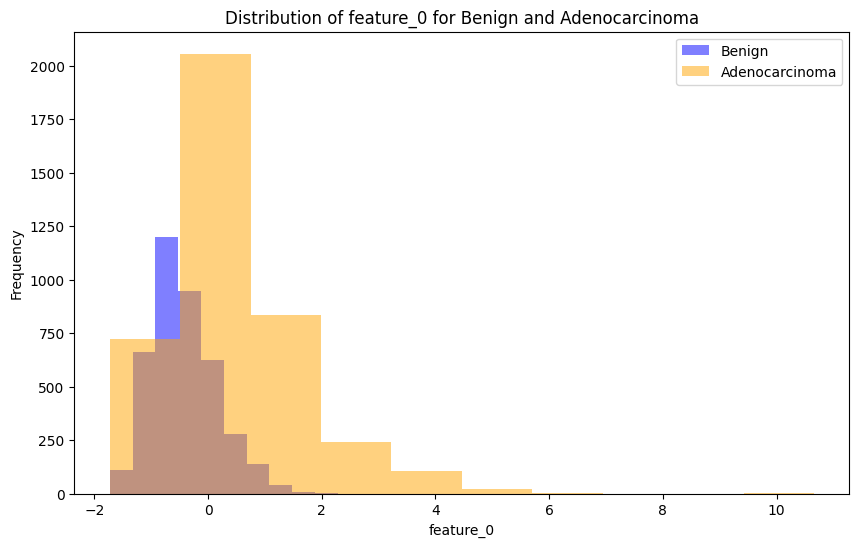

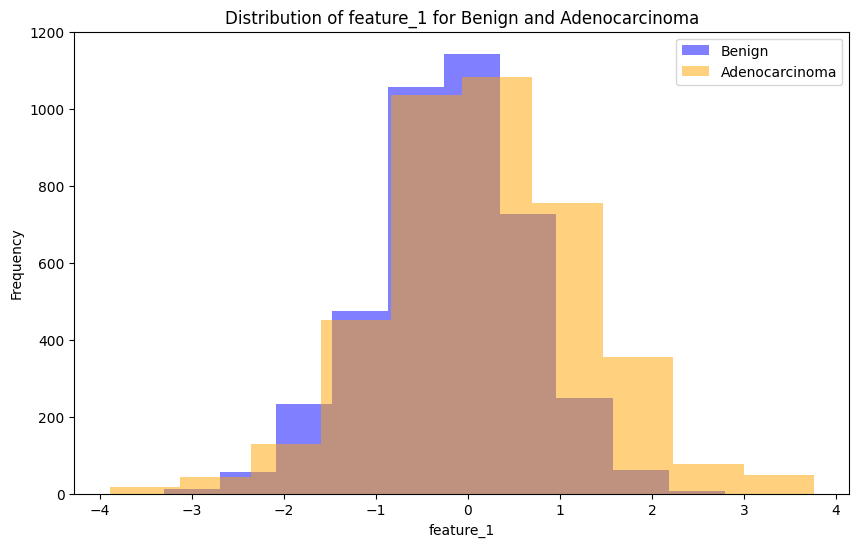

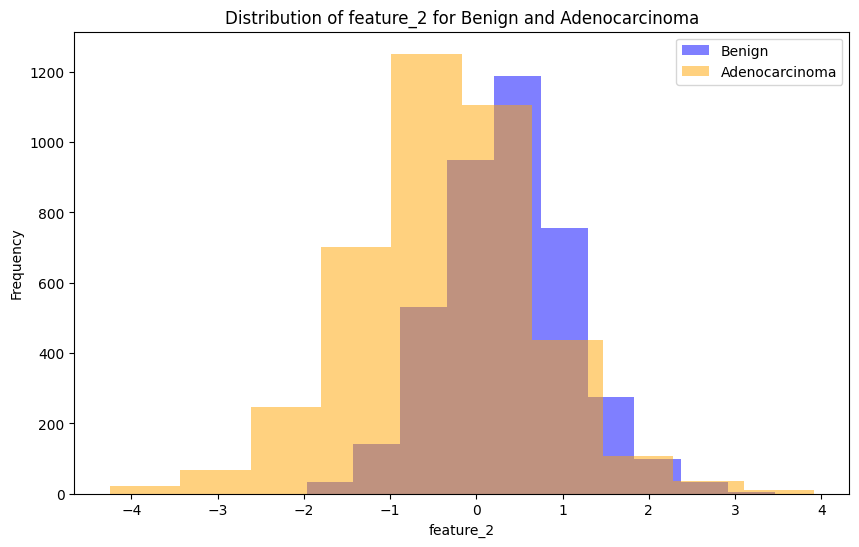

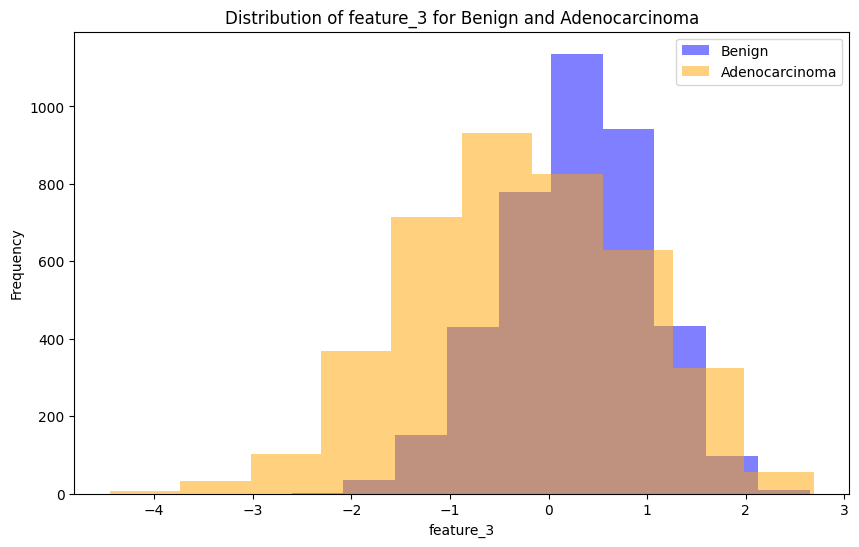

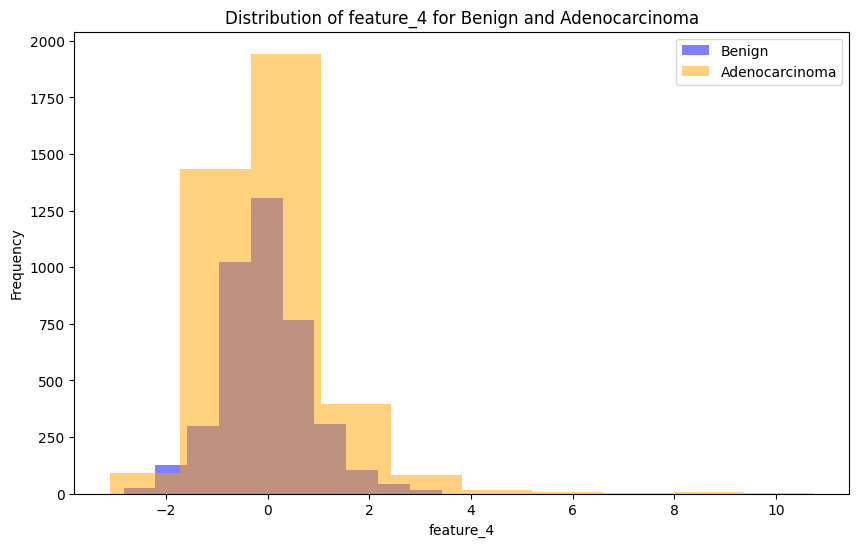

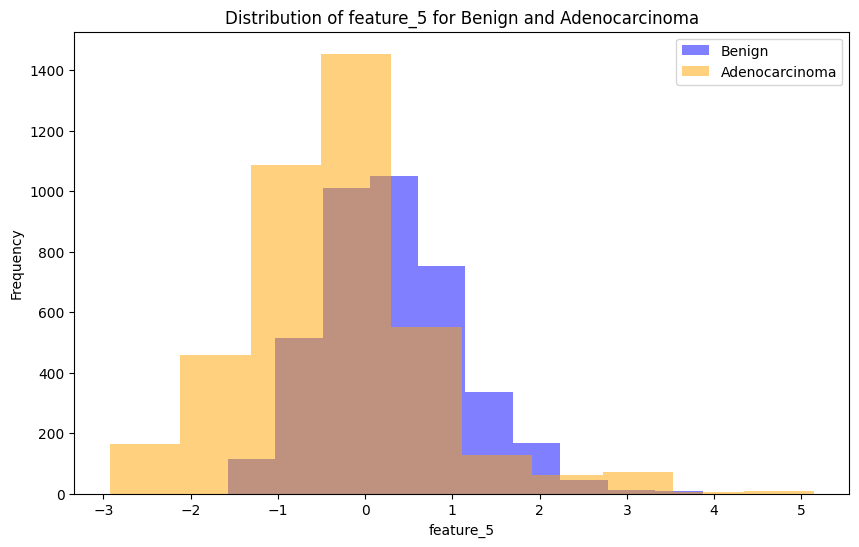

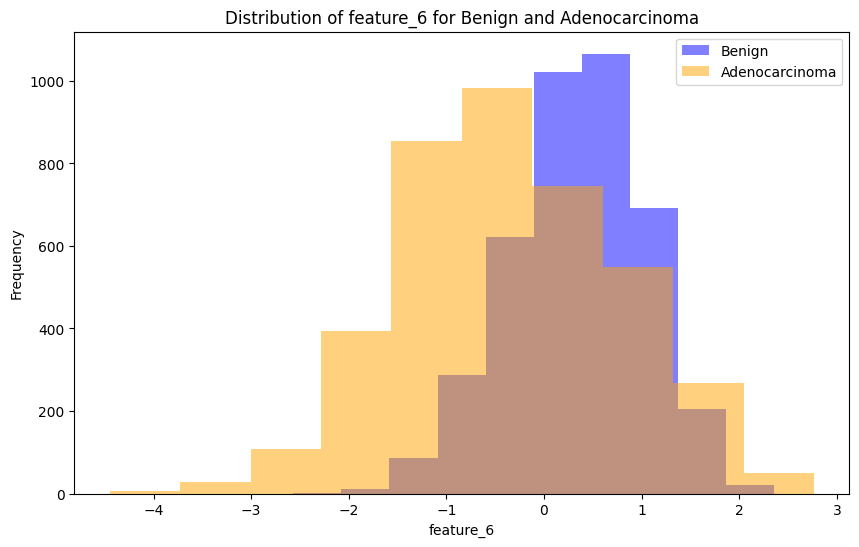

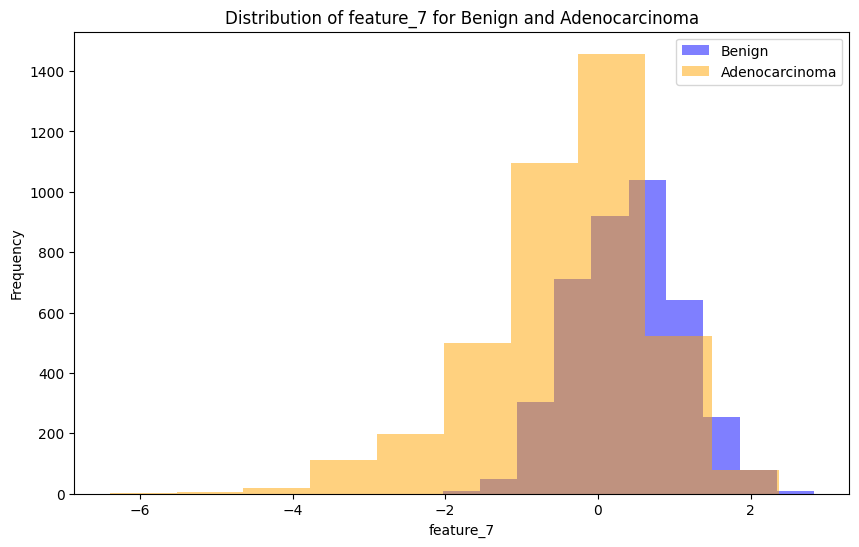

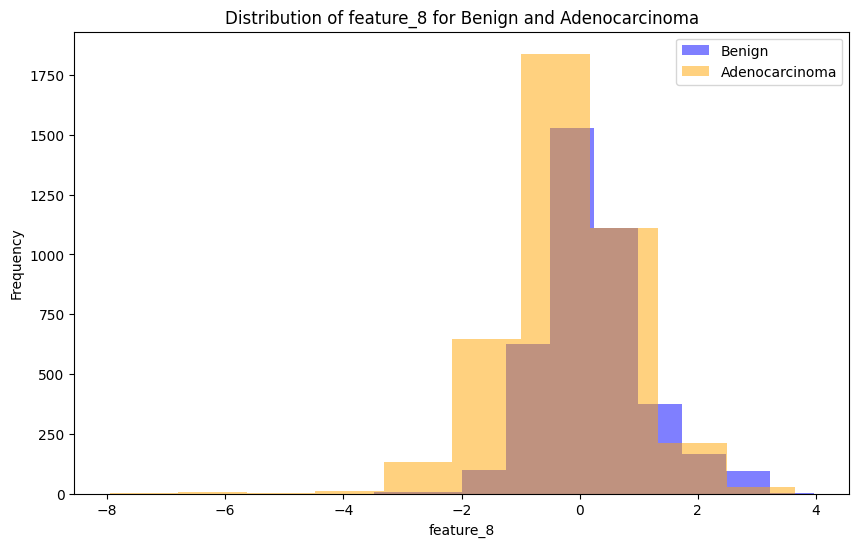

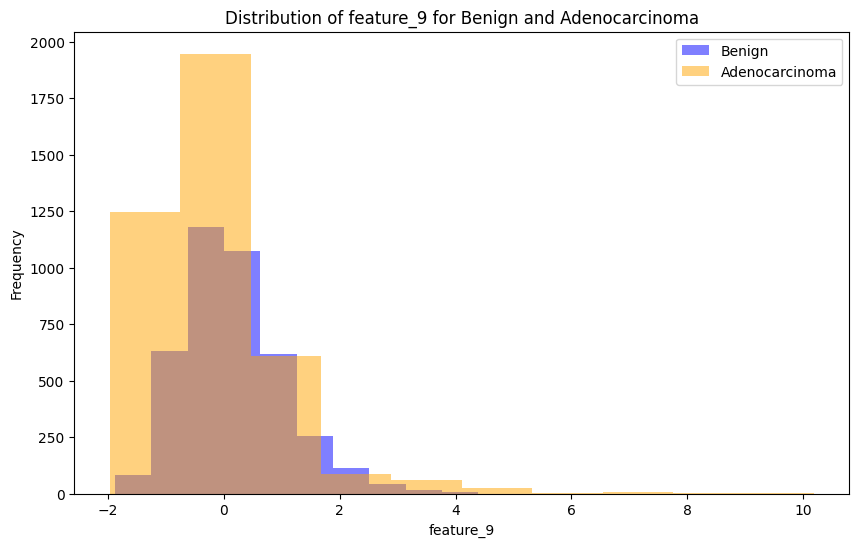

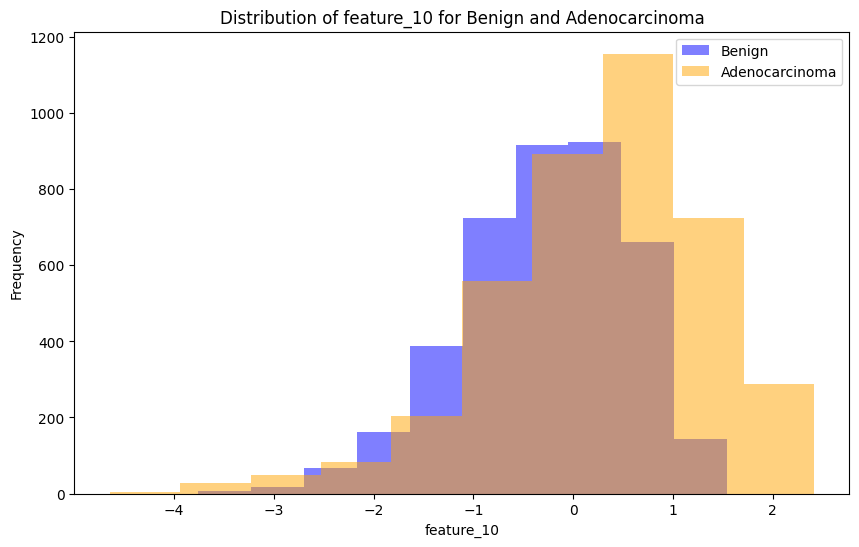

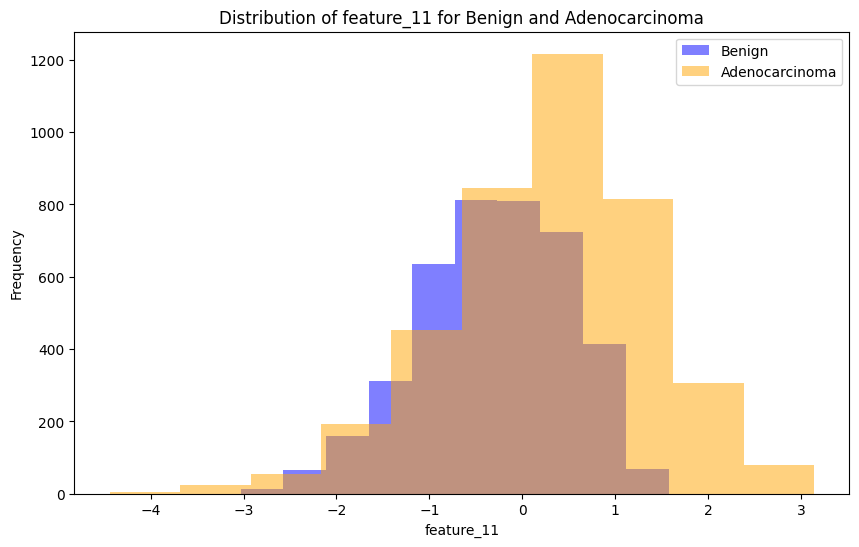

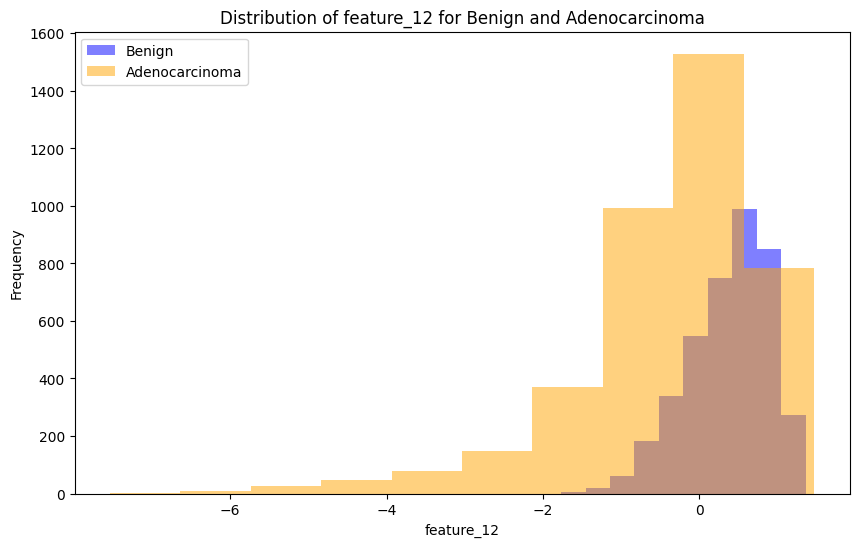

In [5]:
import matplotlib.pyplot as plt

# Visualize distributions for each feature
for column in features_scaled_df.columns[:-1]:  # Exclude the label column
    plt.figure(figsize=(10, 6))
    plt.hist(benign_samples[column], alpha=0.5, label='Benign', color='blue')
    plt.hist(adeno_samples[column], alpha=0.5, label='Adenocarcinoma', color='orange')
    plt.title(f'Distribution of {column} for Benign and Adenocarcinoma')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

In [6]:
import cv2
import numpy as np
import pandas as pd
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import MinMaxScaler

def texture_analysis(image_path):
    # Read the binary image
    binary_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Check if the image was successfully loaded
    if binary_img is None:
        print(f"Error: Unable to read the image at {image_path}")
        return None

    # Ensure the image is 2D
    if len(binary_img.shape) > 2:
        binary_img = cv2.cvtColor(binary_img, cv2.COLOR_BGR2GRAY)

    # Apply Local Binary Pattern (LBP) for texture analysis
    radius = 3
    n_points = 5 * radius
    lbp_img = local_binary_pattern(binary_img, n_points, radius, method='uniform')

    # Flatten and normalize the LBP features
    lbp_features = lbp_img.flatten()
    normalized_features = MinMaxScaler().fit_transform(lbp_features.reshape(-1, 1)).flatten()

    # Return the mean or sum of the normalized LBP features
    return normalized_features.mean()  # or use .sum()

# List of image paths
image_paths = [
    'C:/Users/hp/Downloads/thresholded copy/colon_n/binary3/colonn2.jpeg',
    'C:/Users/hp/Downloads/thresholded copy/colon_n/binary3/colonn10.jpeg',
    'C:/Users/hp/Downloads/thresholded copy/colon_aca/binary3/colonca8.jpeg'
]

# Collect features in a list
features_list = []

# Apply texture analysis to each image
for image_path in image_paths:
    # Get normalized LBP features
    normalized_feature = texture_analysis(image_path)

    # Check if the analysis was successful before adding to the list
    if normalized_feature is not None:
        # Add the feature to the list
        features_list.append(normalized_feature)

# Create a DataFrame from the list of features
df_features1 = pd.DataFrame(features_list, columns=['Normalized_LBP_Feature'])

# Print the DataFrame with a single value for each image
print(df_features1)

   Normalized_LBP_Feature
0                0.695163
1                0.677912
2                0.683695


# Morphlogical Feature Extraction 

In [12]:
import cv2
import numpy as np
import pandas as pd
from skimage.morphology import skeletonize

def extract_morphological_features(image_path):
    # Read the original image
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Find contours in the original image
    contours_original, _ = cv2.findContours(original_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate area and perimeter of the segmented regions in the original image
    total_area_original = sum(cv2.contourArea(contour) for contour in contours_original)
    perimeter_original = sum(cv2.arcLength(contour, True) for contour in contours_original)

    # Threshold the original image
    _, binary_skeleton_original = cv2.threshold(original_img, 127, 255, cv2.THRESH_BINARY)

    # Ensure that binary_skeleton_original is not None before proceeding
    if binary_skeleton_original is not None:
        # Use skeletonize from skimage.morphology for skeletonization
        skeleton_original = skeletonize(binary_skeleton_original)

        elongation_original = np.sum(skeleton_original) / (np.sum(original_img) + 1e-5)

        # Calculate compactness using area and perimeter in the original image
        compactness_original = (perimeter_original ** 2) / (4 * np.pi * total_area_original + 1e-5)

        # Detect and count holes in structures in the original image
        _, binary_inv_original = cv2.threshold(original_img, 127, 255, cv2.THRESH_BINARY_INV)
        _, holes_img_original = cv2.connectedComponents(binary_inv_original)
        num_holes_original = np.max(holes_img_original)

        # Create a DataFrame to store the features
        df_features = pd.DataFrame({
            'Area': [total_area_original],
            'Perimeter': [perimeter_original],
            'Elongation': [elongation_original],
            'Compactness': [compactness_original],
            'Num_Holes': [num_holes_original]
        })

        # Print and return the DataFrame
        print("\nFeature Extraction Results:")
        print(f"Image: {image_path}")
        for column, value in df_features.iloc[0].items():
            print(f"{column}: {value}")
        return df_features
    else:
        print(f"Error processing image: {image_path}")
        return None

# List of image paths
image_paths = [
    'C:/Users/hp/Downloads/thresholded copy/colon_n/binary3/colonn2.jpeg',
    'C:/Users/hp/Downloads/thresholded copy/colon_n/binary3/colonn10.jpeg',
    'C:/Users/hp/Downloads/thresholded copy/colon_aca/binary3/colonca8.jpeg'
]

# Create an empty DataFrame to store features for all images
df_all_features = pd.DataFrame()

# Extract and compare features for each image
for image_path in image_paths:
    df_features = extract_morphological_features(image_path)
    if df_features is not None:
        df_all_features = pd.concat([df_all_features, df_features], ignore_index=True)

# Print the DataFrame with all features
print(df_all_features)




Feature Extraction Results:
Image: C:/Users/hp/Downloads/thresholded copy/colon_n/binary3/colonn2.jpeg
Area: 65025.0
Perimeter: 1020.0
Elongation: 0.001020236797129779
Compactness: 1.273239544719581
Num_Holes: 306.0

Feature Extraction Results:
Image: C:/Users/hp/Downloads/thresholded copy/colon_n/binary3/colonn10.jpeg
Area: 65025.0
Perimeter: 1020.0
Elongation: 0.0009862099222399535
Compactness: 1.273239544719581
Num_Holes: 323.0

Feature Extraction Results:
Image: C:/Users/hp/Downloads/thresholded copy/colon_aca/binary3/colonca8.jpeg
Area: 65016.0
Perimeter: 1027.798989534378
Elongation: 0.0011467840930768501
Compactness: 1.2929634909045942
Num_Holes: 199.0
      Area   Perimeter  Elongation  Compactness  Num_Holes
0  65025.0  1020.00000    0.001020     1.273240        306
1  65025.0  1020.00000    0.000986     1.273240        323
2  65016.0  1027.79899    0.001147     1.292963        199


In [14]:
# Print the DataFrame with all features
print("Feature Extraction Results:")
print(df_all_features)

Feature Extraction Results:
      Area   Perimeter  Elongation  Compactness  Num_Holes
0  65025.0  1020.00000    0.001020     1.273240        306
1  65025.0  1020.00000    0.000986     1.273240        323
2  65016.0  1027.79899    0.001147     1.292963        199


In [29]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.morphology import skeletonize
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import MinMaxScaler

def extract_morphological_features(image_path):
    # Read the original image
    original_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Find contours in the original image
    contours_original, _ = cv2.findContours(original_img, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Calculate area and perimeter of the segmented regions in the original image
    total_area_original = np.sum(np.fromiter((cv2.contourArea(contour) for contour in contours_original), dtype=float))
    perimeter_original = np.sum(np.fromiter((cv2.arcLength(contour, True) for contour in contours_original), dtype=float))

    # Threshold the original image
    _, binary_skeleton_original = cv2.threshold(original_img, 127, 255, cv2.THRESH_BINARY)

    # Ensure that the binary_skeleton_original is not None before proceeding
    if binary_skeleton_original is not None:
        # Use skeletonize from skimage.morphology for skeletonization
        skeleton_original = skeletonize(binary_skeleton_original)

        elongation_original = np.sum(skeleton_original) / (np.sum(original_img) + 1e-5)

        # Calculate compactness using area and perimeter in the original image
        compactness_original = (perimeter_original ** 2) / (4 * np.pi * total_area_original + 1e-5)

        # Detect and count holes in structures in the original image
        _, binary_inv_original = cv2.threshold(original_img, 127, 255, cv2.THRESH_BINARY_INV)
        _, holes_img_original = cv2.connectedComponents(binary_inv_original)
        num_holes_original = np.max(holes_img_original)

        # Create a DataFrame to store the features
        df_features1 = pd.DataFrame({
            'Area': [total_area_original],
            'Perimeter': [perimeter_original],
            'Elongation': [elongation_original],
            'Compactness': [compactness_original],
            'Num_Holes': [num_holes_original],
            'LBP': [np.nan]  # Placeholder for LBP feature
        })

        return df_features1
    else:
        print(f"Error processing image: {image_path}")
        return None

def texture_analysis(image_path):
    # Read the binary image
    binary_img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Apply Local Binary Pattern (LBP) for texture analysis
    radius = 3
    n_points = 5 * radius
    lbp_img = local_binary_pattern(binary_img, n_points, radius, method='uniform')

    # Flatten and normalize the LBP features
    lbp_features = lbp_img.flatten()
    normalized_features = MinMaxScaler().fit_transform(lbp_features.reshape(-1, 1)).flatten()

    # Return the mean or sum of the normalized LBP features
    return normalized_features.mean()  # or use .sum()

def process_images_in_directory(directory_path):
    # List all files in the directory
    image_files = [f for f in os.listdir(directory_path) if f.endswith('.jpeg')]

    # Create an empty DataFrame to store features
    df_features1 = pd.DataFrame()

    # Process each image in the directory
    for image_file in image_files:
        image_path = os.path.join(directory_path, image_file)

        # Extract morphological features
        morphological_features = extract_morphological_features(image_path)

        # Extract LBP feature
        lbp_feature = texture_analysis(image_path)

        # Add the features to the DataFrame
        if morphological_features is not None:
            morphological_features['LBP'] = lbp_feature
            df_features1 = pd.concat([df_features1, morphological_features], ignore_index=True)

    return df_features1

# Specify the directories for image processing
directories = [
    'C:/Users/hp/Downloads/thresholded copy/colon_aca/binary3',
    'C:/Users/hp/Downloads/thresholded copy/colon_n/binary3'
]

# Process images in each directory
df_all_features = pd.DataFrame()
for directory in directories:
    df_features1 = process_images_in_directory(directory)
    df_all_features = pd.concat([df_all_features, df_features1], ignore_index=True)

# Print the top 10 rows of the DataFrame
print("\nTop 10 Rows of Feature Extraction Results:")
print(df_all_features.head(10))



Top 10 Rows of Feature Extraction Results:
      Area    Perimeter  Elongation  Compactness  Num_Holes       LBP
0  65025.0  1020.000000    0.001503     1.273240        471  0.691886
1  65025.0  1020.000000    0.000894     1.273240        206  0.687344
2  65025.0  1020.000000    0.001133     1.273240        484  0.703426
3  65025.0  1020.000000    0.001207     1.273240        465  0.694353
4  65023.0  1021.656854    0.001050     1.277419        317  0.706456
5  65025.0  1020.000000    0.000985     1.273240        276  0.703495
6  65024.0  1020.828427    0.001062     1.275328        184  0.691786
7  65025.0  1020.000000    0.001096     1.273240        317  0.711461
8  65025.0  1020.000000    0.000943     1.273240        280  0.698656
9  65021.0  1021.656854    0.001428     1.277458        397  0.689227


In [30]:
import os
import cv2
import numpy as np
import pandas as pd
from skimage.morphology import skeletonize
from skimage.feature import local_binary_pattern
from sklearn.preprocessing import MinMaxScaler

# Your existing feature DataFrame


# Function to extract information from file paths
# Function to extract information from file paths
def extract_image_info(row, directory):
    # Assuming labels and filenames are derived from the index
    index = row['index']
    labels = 'label_' + str(index)
    filename = 'file_' + str(index)

    # Combine information with the directory
    image = os.path.join(directory, labels, filename)

    return image, labels, filename

# Apply the function to each row in the DataFrame
extracted_info = df_all_features.reset_index().apply(lambda row: extract_image_info(row, 'your_directory'), axis=1)

# Ensure the lengths match before assigning to the DataFrame
if len(extracted_info) == len(df_all_features):
    df_all_features[['images', 'labels', 'filename']] = pd.DataFrame(extracted_info.tolist())
else:
    print("Lengths do not match!")

# Reorder the columns
df_all_features = df_all_features[['images', 'labels', 'filename', 'Area', 'Perimeter', 'Elongation', 'Compactness', 'Num_Holes', 'LBP']]

# Print the modified DataFrame
print("\nModified DataFrame:")
print(df_all_features)


Modified DataFrame:
                                       images        labels     filename   
0           your_directory\label_0.0\file_0.0     label_0.0     file_0.0  \
1           your_directory\label_1.0\file_1.0     label_1.0     file_1.0   
2           your_directory\label_2.0\file_2.0     label_2.0     file_2.0   
3           your_directory\label_3.0\file_3.0     label_3.0     file_3.0   
4           your_directory\label_4.0\file_4.0     label_4.0     file_4.0   
...                                       ...           ...          ...   
9995  your_directory\label_9995.0\file_9995.0  label_9995.0  file_9995.0   
9996  your_directory\label_9996.0\file_9996.0  label_9996.0  file_9996.0   
9997  your_directory\label_9997.0\file_9997.0  label_9997.0  file_9997.0   
9998  your_directory\label_9998.0\file_9998.0  label_9998.0  file_9998.0   
9999  your_directory\label_9999.0\file_9999.0  label_9999.0  file_9999.0   

         Area    Perimeter  Elongation  Compactness  Num_Holes    

In [31]:
# Function to extract information from file paths
def extract_image_info(row, directory):
    # Assuming labels and filenames are derived from the index
    index = row['index']
    filename = 'file_' + str(index)

    # Set labels based on index
    labels = 'adenocarcinoma' if index < 5000 else 'benign'

    # Combine information with the directory
    image = os.path.join(directory, labels, filename)

    return image, labels, filename

# Apply the function to each row in the DataFrame
extracted_info = df_all_features.reset_index().apply(lambda row: extract_image_info(row, 'your_directory'), axis=1)

# Ensure the lengths match before assigning to the DataFrame
if len(extracted_info) == len(df_all_features):
    df_all_features[['images', 'labels', 'filename']] = pd.DataFrame(extracted_info.tolist())
else:
    print("Lengths do not match!")

# Reorder the columns
df_all_features = df_all_features[['images', 'labels', 'filename', 'Area', 'Perimeter', 'Elongation', 'Compactness', 'Num_Holes', 'LBP']]

# Print the modified DataFrame
print("\nModified DataFrame:")
print(df_all_features)


Modified DataFrame:
                                    images          labels   filename   
0     your_directory\adenocarcinoma\file_0  adenocarcinoma     file_0  \
1     your_directory\adenocarcinoma\file_1  adenocarcinoma     file_1   
2     your_directory\adenocarcinoma\file_2  adenocarcinoma     file_2   
3     your_directory\adenocarcinoma\file_3  adenocarcinoma     file_3   
4     your_directory\adenocarcinoma\file_4  adenocarcinoma     file_4   
...                                    ...             ...        ...   
9995       your_directory\benign\file_9995          benign  file_9995   
9996       your_directory\benign\file_9996          benign  file_9996   
9997       your_directory\benign\file_9997          benign  file_9997   
9998       your_directory\benign\file_9998          benign  file_9998   
9999       your_directory\benign\file_9999          benign  file_9999   

         Area    Perimeter  Elongation  Compactness  Num_Holes       LBP  
0     65025.0  1020.000000 

In [32]:
# Function to extract information from file paths
def extract_image_info(row, directory):
    # Assuming labels and filenames are derived from the index
    index = row['index']
    filename = 'file_' + str(index)

    # Set labels based on index
    labels = 'adenocarcinoma' if index < 5000 else 'benign'

    # Combine information with the directory
    image = os.path.join(directory, labels, filename)

    return image, labels, filename

# Apply the function to each row in the DataFrame
extracted_info = df_all_features.reset_index().apply(lambda row: extract_image_info(row, 'your_directory'), axis=1)

# Ensure the lengths match before assigning to the DataFrame
if len(extracted_info) == len(df_all_features):
    df_all_features[['images', 'labels', 'filename']] = pd.DataFrame(extracted_info.tolist())
else:
    print("Lengths do not match!")

# Reorder the columns
df_all_features = df_all_features[['images', 'labels', 'filename', 'Area', 'Perimeter', 'Elongation', 'Compactness', 'Num_Holes', 'LBP']]

# Print the modified DataFrame
print("\nModified DataFrame:")
print(df_all_features)


Modified DataFrame:
                                    images          labels   filename   
0     your_directory\adenocarcinoma\file_0  adenocarcinoma     file_0  \
1     your_directory\adenocarcinoma\file_1  adenocarcinoma     file_1   
2     your_directory\adenocarcinoma\file_2  adenocarcinoma     file_2   
3     your_directory\adenocarcinoma\file_3  adenocarcinoma     file_3   
4     your_directory\adenocarcinoma\file_4  adenocarcinoma     file_4   
...                                    ...             ...        ...   
9995       your_directory\benign\file_9995          benign  file_9995   
9996       your_directory\benign\file_9996          benign  file_9996   
9997       your_directory\benign\file_9997          benign  file_9997   
9998       your_directory\benign\file_9998          benign  file_9998   
9999       your_directory\benign\file_9999          benign  file_9999   

         Area    Perimeter  Elongation  Compactness  Num_Holes       LBP  
0     65025.0  1020.000000 

In [33]:
import os

# Function to fix image paths based on labels
def fix_image_paths(row):
    if row['labels'] == 'adenocarcinoma':
        directory = 'C:/Users/hp/Downloads/thresholded copy/colon_aca/binary3'
        filename = 'colonca' + str(row.name) + '.jpeg'
    elif row['labels'] == 'benign':
        directory = 'C:/Users/hp/Downloads/thresholded copy/colon_nt/colon_n/binary3'
        filename = 'colonn' + str(row.name - 5000) + '.jpeg'
    else:
        return 'Invalid Label'

    image_path = os.path.join(directory, filename)
    return image_path

# Apply the function to fix image paths
df_all_features['images'] = df_all_features.apply(fix_image_paths, axis=1)

# Print the modified DataFrame
print("\nModified DataFrame:")
print(df_all_features)


Modified DataFrame:
                                                 images          labels   
0     C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma  \
1     C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   
2     C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   
3     C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   
4     C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   
...                                                 ...             ...   
9995  C:/Users/hp/Downloads/thresholded copy/colon_n...          benign   
9996  C:/Users/hp/Downloads/thresholded copy/colon_n...          benign   
9997  C:/Users/hp/Downloads/thresholded copy/colon_n...          benign   
9998  C:/Users/hp/Downloads/thresholded copy/colon_n...          benign   
9999  C:/Users/hp/Downloads/thresholded copy/colon_n...          benign   

       filename     Area    Perimeter  Elongation  Compactness  Num_Holes   
0

In [53]:
print(df_all_features.head(10))
print(features_scaled_df.head(10))


                                              images          labels filename   
0  C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   file_0  \
1  C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   file_1   
2  C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   file_2   
3  C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   file_3   
4  C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   file_4   
5  C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   file_5   
6  C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   file_6   
7  C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   file_7   
8  C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   file_8   
9  C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   file_9   

      Area    Perimeter  Elongation  Compactness  Num_Holes       LBP  
0  65025.0  1020.000000    0.001503 

In [54]:
print(df_all_features.shape)
print(features_scaled_df.shape)

(10000, 9)
(10000, 14)


In [55]:
df1 = df_all_features 
df2 = features_scaled_df

In [56]:
# Assuming DF1 and DF2 are your DataFrames
df1.reset_index(drop=True, inplace=True)
df2.reset_index(drop=True, inplace=True)

# Concatenate the two DataFrames along columns (axis=1)
merged_df = pd.concat([df1, df2], axis=1)

# Display the merged DataFrame
print(merged_df)


                                                 images          labels   
0     C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma  \
1     C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   
2     C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   
3     C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   
4     C:/Users/hp/Downloads/thresholded copy/colon_a...  adenocarcinoma   
...                                                 ...             ...   
9995  C:/Users/hp/Downloads/thresholded copy/colon_n...          benign   
9996  C:/Users/hp/Downloads/thresholded copy/colon_n...          benign   
9997  C:/Users/hp/Downloads/thresholded copy/colon_n...          benign   
9998  C:/Users/hp/Downloads/thresholded copy/colon_n...          benign   
9999  C:/Users/hp/Downloads/thresholded copy/colon_n...          benign   

       filename     Area    Perimeter  Elongation  Compactness  Num_Holes   
0        file_0  65025

In [58]:
merged_df = merged_df.drop(columns=['label'])

In [67]:
merged_df

,images,labels,filename,Area,Perimeter,Elongation,Compactness,Num_Holes,LBP,feature_0,...,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12
0,C:/Users/hp/Downloads/thresholded copy/colon_a...,adenocarcinoma,file_0,65025.0,1020.000000,0.001503,1.273240,471,0.691886,3.865534,...,0.856797,0.474074,-2.021989,0.214654,-3.193037,-2.156239,-0.840164,1.967251,2.288677,-4.048086
1,C:/Users/hp/Downloads/thresholded copy/colon_a...,adenocarcinoma,file_1,65025.0,1020.000000,0.000894,1.273240,206,0.687344,-0.250920,...,0.677683,1.384001,0.466249,0.678681,-0.088110,-0.901739,0.980729,-0.762757,-1.122692,0.778496
2,C:/Users/hp/Downloads/thresholded copy/colon_a...,adenocarcinoma,file_2,65025.0,1020.000000,0.001133,1.273240,484,0.703426,-0.274329,...,-0.184979,0.403874,1.349606,-0.120328,-0.706804,-0.792944,0.179974,-0.441389,-0.008527,0.092138
3,C:/Users/hp/Downloads/thresholded copy/colon_a...,adenocarcinoma,file_3,65025.0,1020.000000,0.001207,1.273240,465,0.694353,-0.342766,...,0.066168,-1.158616,0.660383,0.017083,0.489850,1.143938,-1.097926,0.835584,0.888380,-0.442798
4,C:/Users/hp/Downloads/thresholded copy/colon_a...,adenocarcinoma,file_4,65023.0,1021.656854,0.001050,1.277419,317,0.706456,0.896232,...,1.607401,2.678148,0.152199,1.757175,-1.429106,-1.758038,1.049322,-0.313165,-0.727066,0.488950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,C:/Users/hp/Downloads/thresholded copy/colon_n...,benign,file_9995,65023.0,1020.828427,0.000937,1.275348,287,0.676179,-1.476933,...,-0.509718,-1.671934,1.015504,-0.057523,2.203884,2.709726,-0.896480,0.121770,0.205528,0.465730
9996,C:/Users/hp/Downloads/thresholded copy/colon_n...,benign,file_9996,65025.0,1020.000000,0.000943,1.273240,306,0.684816,-0.532124,...,0.355466,-0.176064,0.276442,0.425265,0.656598,0.430803,0.161003,-0.330531,-0.369695,0.551833
9997,C:/Users/hp/Downloads/thresholded copy/colon_n...,benign,file_9997,65025.0,1020.000000,0.001074,1.273240,277,0.678639,-0.080684,...,0.091360,-0.937433,-1.039245,0.177206,0.609274,0.967677,-0.737645,0.527587,0.390514,0.059227
9998,C:/Users/hp/Downloads/thresholded copy/colon_n...,benign,file_9998,65025.0,1020.000000,0.001059,1.273240,284,0.679056,-0.113382,...,0.068170,-0.886043,-1.018331,0.156653,0.615710,0.910712,-0.666742,0.449301,0.306391,0.123066


In [59]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming merged_df is your DataFrame
benign_samples = merged_df[merged_df['labels'] == 'benign']
adeno_samples = merged_df[merged_df['labels'] == 'adenocarcinoma']

for column in merged_df.columns[4:-1]:  # Assuming the first 4 columns are not features
    # Convert values to numeric, coercing errors to NaN
    benign_samples[column] = pd.to_numeric(benign_samples[column], errors='coerce')
    adeno_samples[column] = pd.to_numeric(adeno_samples[column], errors='coerce')

    # Perform t-test for each feature
    t_stat, p_value = ttest_ind(benign_samples[column], adeno_samples[column], nan_policy='omit')
    print(f'Test for {column}: t_stat={t_stat}, p_value={p_value}')


Test for Perimeter: t_stat=-5.4834133691006395, p_value=4.273487868922606e-08
Test for Elongation: t_stat=-53.959396728052006, p_value=0.0
Test for Compactness: t_stat=-5.495322523645383, p_value=3.995683475808006e-08
Test for Num_Holes: t_stat=-41.97514917136211, p_value=0.0
Test for LBP: t_stat=-26.3912996762333, p_value=1.9355949703527155e-148
Test for feature_0: t_stat=-47.08153863688453, p_value=0.0
Test for feature_1: t_stat=-18.921020481936456, p_value=1.782790489709432e-78
Test for feature_2: t_stat=41.02553081137578, p_value=0.0
Test for feature_3: t_stat=28.390828431452263, p_value=1.3603218727018112e-170
Test for feature_4: t_stat=-3.0716541490250155, p_value=0.002134481652228931
Test for feature_5: t_stat=34.35425028106177, p_value=1.3859093093990493e-244
Test for feature_6: t_stat=36.493618566868946, p_value=7.556541412814891e-274
Test for feature_7: t_stat=42.15657251535296, p_value=0.0
Test for feature_8: t_stat=22.369938218434132, p_value=3.39137644739793e-108
Test for 

C:\Users\hp\AppData\Local\Temp\ipykernel_19376\318271623.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benign_samples[column] = pd.to_numeric(benign_samples[column], errors='coerce')
C:\Users\hp\AppData\Local\Temp\ipykernel_19376\318271623.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adeno_samples[column] = pd.to_numeric(adeno_samples[column], errors='coerce')


In [79]:
alpha = 0.05

# Print the names of significant features
significant_features = [column for column in merged_df.columns[4:-1] if ttest_ind(benign_samples[column], adeno_samples[column], nan_policy='omit')[1] <= alpha]

print("Significant Features:")
print(significant_features)

Significant Features:
['Perimeter', 'Elongation', 'Compactness', 'Num_Holes', 'LBP', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11']


# Feature Selection

In [70]:
import pandas as pd
from scipy import stats

# Assuming 'merged_df' is your DataFrame
# Extract the feature columns
feature_columns = merged_df.columns[11:]

# Create a dictionary to store the effect sizes for each feature
effect_sizes = {}




# Iterate over each feature and calculate Cohen's d
for feature in feature_columns:
    # Split the dataset into two groups based on the 'labels' column
    group_1 = merged_df[merged_df['labels'] == 'adenocarcinoma'][feature]
    group_2 = merged_df[merged_df['labels'] == 'benign'][feature]

    # Calculate Cohen's d
    pooled_std = np.sqrt((group_1.var() + group_2.var()) / 2)
    effect_size = abs((group_1.mean() - group_2.mean()) / pooled_std)
    
    # Store the effect size in the dictionary
    effect_sizes[feature] = effect_size

# Print or further analyze the effect sizes
print("Effect Sizes (Cohen's d):")
for feature, effect_size in effect_sizes.items():
    print(f"{feature}: {effect_size}")


Effect Sizes (Cohen's d):
feature_2: 0.8205106162275156
feature_3: 0.5678165686290452
feature_4: 0.06143308298050032
feature_5: 0.6870850056212355
feature_6: 0.7298723713373789
feature_7: 0.8431314503070593
feature_8: 0.44739876436868264
feature_9: 0.3672789184678944
feature_10: 0.5754586113581689
feature_11: 0.6397615284749397
feature_12: 0.7986771844942704


In [77]:
import pandas as pd
import numpy as np
from scipy import stats

# Assuming 'merged_df' is your DataFrame
# Extract the feature columns
feature_columns = merged_df.columns[4:]  # Starting from 'Area'

# Dictionary to store the mean effect sizes for each feature
mean_effect_sizes = {}

# Iterate over each feature column
for target_feature in feature_columns:
    # Create groups based on the unique values of the target feature
    groups = merged_df[target_feature].unique()
    
    # Dictionary to store the effect sizes for each group
    effect_sizes = {}

    # Iterate over each group and calculate Cohen's d
    for group in groups:
        group_1 = merged_df[merged_df[target_feature] == group]
        group_2 = merged_df[merged_df[target_feature] != group]

        # Exclude non-numeric columns, assuming 'labels' is the non-numeric column
        group_1_numeric = group_1.select_dtypes(include=np.number)
        group_2_numeric = group_2.select_dtypes(include=np.number)

        # Calculate Cohen's d
        effect_size = abs((group_1_numeric.mean() - group_2_numeric.mean()) / pooled_std)

        # Store the effect size in the dictionary
        effect_sizes[group] = effect_size.mean()

    # Store the mean effect size for the feature in the main dictionary
    mean_effect_sizes[target_feature] = effect_sizes

# Thresholds for large and medium effects
large_effect_threshold = 0.5
medium_effect_threshold = 0.2

# Filter features based on the threshold
large_effect_features = [feature for feature, effect_sizes in mean_effect_sizes.items() if max(effect_sizes.values()) >= large_effect_threshold]
medium_effect_features = [feature for feature, effect_sizes in mean_effect_sizes.items() if medium_effect_threshold <= max(effect_sizes.values()) < large_effect_threshold]

# Print or use the lists of features
print(f"Features with Large Effect (Cohen's d >= {large_effect_threshold}):")
print(large_effect_features)

print(f"\nFeatures with Medium Effect (Cohen's d >= {medium_effect_threshold} and < {large_effect_threshold}):")
print(medium_effect_features)





Features with Large Effect (Cohen's d >= 0.5):
['Perimeter', 'Elongation', 'Compactness', 'Num_Holes', 'LBP', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12']

Features with Medium Effect (Cohen's d >= 0.2 and < 0.5):
[]


In [80]:
significant_features = ['Perimeter', 'Elongation', 'Compactness', 'Num_Holes', 'LBP', 'feature_0', 'feature_1', 'feature_2', 'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11']

In [52]:
pip install torch torchvision


In [81]:
import torch


In [82]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

from torchvision import transforms, models
from PIL import Image
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# RESNET-18

In [84]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, models
from sklearn.model_selection import train_test_split
from PIL import Image
import os
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Specify the path to your dataset
data_dir = 'C:/Users/hp/Documents/colon_image_sets'

# Load the features DataFrame
# Assuming features_scaled_df is already defined and contains the significant features

# Create a DataFrame with file paths and labels
filepaths = []
labels = []

# List the subfolders in the dataset directory (assuming one folder for each class)
subfolders = os.listdir(data_dir)

# Iterate through subfolders
for subfolder in subfolders:
    subfolder_path = os.path.join(data_dir, subfolder)
    
    # List files in the subfolder
    files = os.listdir(subfolder_path)
    
    # Extract file paths and assign labels based on subfolder names
    for file in files:
        file_path = os.path.join(subfolder_path, file)
        
        # Skip files that don't match expected subfolder names
        if subfolder not in ['adenocarcinomas', 'benign']:
            continue
        
        filepaths.append(file_path)
        
        # Assign labels based on subfolder names
        if subfolder == 'adenocarcinomas':
            labels.append('adenocarcinoma')
        elif subfolder == 'benign':
            labels.append('benign')

# Create a DataFrame to store file paths and labels
df = pd.DataFrame({'filepaths': filepaths, 'labels': labels})

# Extract the filenames for merging with features_df
df['filename'] = df['filepaths'].apply(lambda x: os.path.basename(x))



# Merge the features with the original DataFrame based on index
df = pd.merge(df, merged_df.iloc[:, [0] + [merged_df.columns.get_loc(col) + 1 for col in significant_features]], left_index=True, right_index=True)

# Create a LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels in your DataFrame
df['labels'] = label_encoder.fit_transform(df['labels'])

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

# Define a custom dataset class
class CustomDataset(Dataset):
    
    def __init__(self, dataframe, transform=None):
        self.dataframe = dataframe
        self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        img_path = self.dataframe.iloc[idx, 0]
        image = Image.open(img_path).convert('RGB')
        label = torch.tensor(self.dataframe.iloc[idx, 1], dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, label

# Define transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])

# Create instances of custom datasets and dataloaders
train_dataset = CustomDataset(train_df, transform=transform)
test_dataset = CustomDataset(test_df, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Define the CNN model
class CNNModel(nn.Module):
    def __init__(self, num_classes=2):
        super(CNNModel, self).__init__()
        resnet18 = models.resnet18(pretrained=True)
        # Use resnet18.children() to get the layers of the ResNet model
        self.features = nn.Sequential(*list(resnet18.children())[:-1])
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

    def forward(self, x):
        x = self.features(x)
        x = self.avgpool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

# Initialize the model, loss function, and optimizer
model = CNNModel()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the model
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch + 1}/{num_epochs}, Loss: {running_loss / len(train_loader)}")

# Test the model
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = correct / total
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\hp\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/10, Loss: 0.037726592775507016
Epoch 2/10, Loss: 0.01728669850204915
Epoch 3/10, Loss: 0.007131963309551793
Epoch 4/10, Loss: 0.008385545275907133
Epoch 5/10, Loss: 0.015182582304261814
Epoch 6/10, Loss: 0.001380028878008943
Epoch 7/10, Loss: 0.006317285999911149
Epoch 8/10, Loss: 0.0006371028786791158
Epoch 9/10, Loss: 0.00020111309379051078
Epoch 10/10, Loss: 0.00015019773335575337
Accuracy on the test set: 99.90%


In [85]:
from sklearn.metrics import classification_report, confusion_matrix

# Set the model to evaluation mode
model.eval()

# Lists to store true labels and predicted labels
true_labels = []
predicted_labels = []

# Iterate through the test loader
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)

        true_labels.extend(labels.numpy())
        predicted_labels.extend(predicted.numpy())

# Convert the lists to numpy arrays
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

print("Confusion Matrix:")
print(confusion_matrix(true_labels, predicted_labels))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1012
           1       1.00      1.00      1.00       988

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

Confusion Matrix:
[[1010    2]
 [   0  988]]
